In [1]:
import numpy as np

np.random.seed(42)

mu, sigma = 0, 1
q = {k+1: v for k, v in enumerate(np.random.normal(mu, sigma, 5))} # almaceno 10 numeros random
q

{1: 0.4967141530112327,
 2: -0.13826430117118466,
 3: 0.6476885381006925,
 4: 1.5230298564080254,
 5: -0.23415337472333597}

Algoritmos de Gradiente

In [10]:
def softmax(x):
    return np.exp(x)/sum(np.exp(x))

In [22]:
partidas = 1000
turnos = 100
alphas = [0.1, 0.4]
# epsilons = [0.1, 0.1]
recompensas_medias = np.zeros((len(epsilons), turnos))
acciones_optimas = np.zeros((len(epsilons), turnos))

for ejer in range(partidas):
    mejor_accion = max(q, key=q.get) # obtengo la mejor accion
    for i, alpha in enumerate(alphas):
        H = np.zeros(5) # inicializo el vector de preferencias
        pi = softmax(H) # calculo la probabilidad tomar cada accion
        recompensas = []

        # juego 100 turnos
        for exp in range(turnos):
            #elegir la accion a tomar
            accion = np.random.choice(range(1,6), 1, p=pi)[0] #  (range(aleatorio), 1_solo_valor, p=probabilidad)
            recompensa = q[accion]
            recompensas.append(recompensa)
            recompensa_media = np.mean(recompensas)

            # actualizar las preferencias
            for up in range(5):
                if up == accion-1:
                    # Ht+1(a)=Ht(a)+α(Rt−Rt~)(1−πt(At))
                    H[up] += alpha*(recompensa - recompensa_media)*(1-pi[up]) # si es una mala accion se actualiza con la recompensa negativa
                else:
                    H[up] -= alpha*(recompensa - recompensa_media)*pi[up] # si es una buena accion se actualiza con la recompensa positiva

            # actualizar la probabilidad de tomar cada accion
            pi = softmax(H)
            recompensas_medias[i][exp] += recompensa
            acciones_optimas[i][exp] += 1 if accion == np.argmax(q)+1 else 0

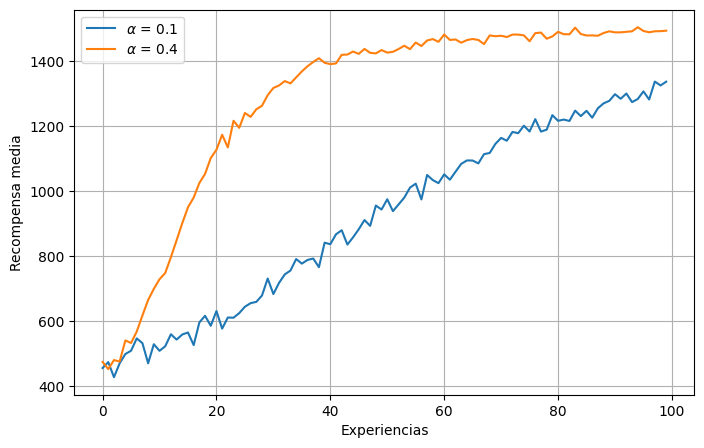

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
for i, a in enumerate(alphas):
    plt.plot(recompensas_medias[i], label=fr'$\alpha$ = {a}')
plt.legend()
plt.grid(True)
plt.xlabel('Experiencias')
plt.ylabel('Recompensa media')
plt.show()